In [1]:
# Importando o tensorflow e verificando a versão
import tensorflow as tf
tf.__version__

'2.4.0'

In [2]:
# Import de outras bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style('whitegrid')

In [3]:
# Gerando um pd.DataFrame através de um arquivo excel
df = pd.read_csv('fake_reg.csv')

In [4]:
# DataFrame
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [5]:
# Verificar valores null:
df.isnull().sum()

price       0
feature1    0
feature2    0
dtype: int64

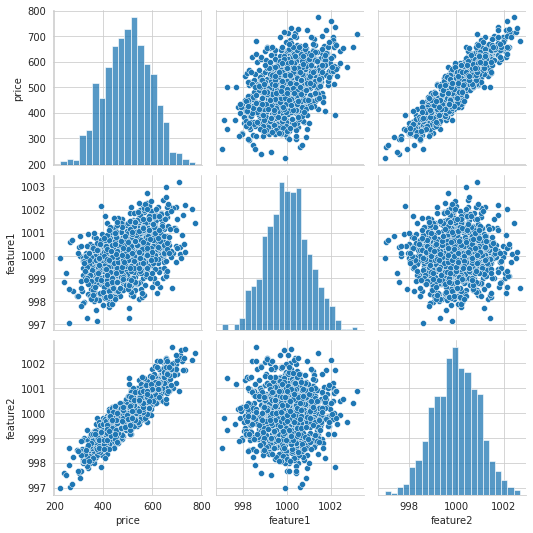

In [6]:
# Visualization
sns.pairplot(df)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# Por ser tensorflow, devemos passar com 2 colchetes [[]].values
# Assim os valores viram numpy arrays inves de pandas dataframes
X = df[['feature1', 'feature2']].values
y = df[['price']].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
X_train.shape

(700, 2)

In [11]:
X_test.shape

(300, 2)

In [12]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [14]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [15]:
X_train = scaler.transform(X_train)

In [16]:
X_test = scaler.transform(X_test)

In [17]:
# Criando e treinando o modelo

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [19]:
# units = neuronios no layers (4)
# activation = faz a chamada da função de ativação 
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mse')

In [20]:
model.fit(X_train,y_train,epochs=250)

Epoch 1/250
22/22 [==============================] - 1s 2ms/step - loss: 259851.6549
Epoch 2/250
22/22 [==============================] - 0s 1ms/step - loss: 261353.1848
Epoch 3/250
22/22 [==============================] - 0s 1ms/step - loss: 252811.0530
Epoch 4/250
22/22 [==============================] - 0s 1ms/step - loss: 258909.2385
Epoch 5/250
22/22 [==============================] - 0s 1ms/step - loss: 255947.2466
Epoch 6/250
22/22 [==============================] - 0s 1ms/step - loss: 257172.1046
Epoch 7/250
22/22 [==============================] - 0s 1ms/step - loss: 258419.8404
Epoch 8/250
22/22 [==============================] - 0s 1ms/step - loss: 256698.2527
Epoch 9/250
22/22 [==============================] - 0s 1ms/step - loss: 258664.1236
Epoch 10/250
22/22 [==============================] - 0s 1ms/step - loss: 254106.4579
Epoch 11/250
22/22 [==============================] - 0s 1ms/step - loss: 254201.0564
Epoch 12/250
22/22 [==============================] - 0s 1ms/st

In [21]:
loss_data = pd.DataFrame(model.history.history)

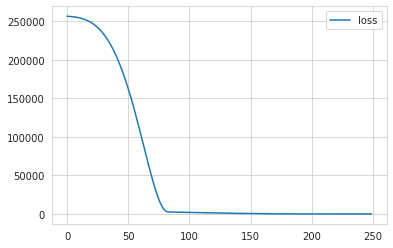

In [22]:
loss_data.plot()

In [23]:
# Model Evaluation
model.evaluate(X_test,y_test,verbose=0)

26.93435287475586

In [24]:
# Model Evaluation
model.evaluate(X_train,y_train,verbose=0)

24.644079208374023

In [25]:
test_predictions = model.predict(X_test)

In [26]:
# Passando para um pandas Series
test_predictions = pd.Series(test_predictions.reshape(300,))

In [27]:
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])

In [28]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [29]:
pred_df.columns = ['Test True Y', 'Predictions']

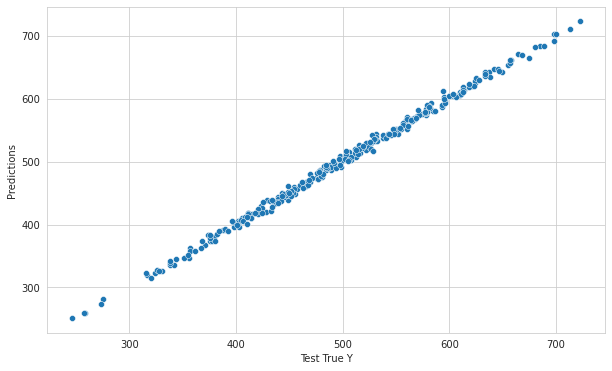

In [30]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x='Test True Y', y='Predictions', data=pred_df)

In [31]:
# Metricas de validaçao de regressoes
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [32]:
mean_absolute_error(pred_df['Test True Y'], pred_df['Predictions'])

4.208807068479741

In [33]:
mean_squared_error(pred_df['Test True Y'], pred_df['Predictions'])

26.934353877400646

In [34]:
# Root Mean Square error:
mean_squared_error(pred_df['Test True Y'], pred_df['Predictions'])**0.5

5.189831777370115

In [35]:
# PREDIZENDO NOVOS DADOS
new_gem = [[998,1000]]

In [36]:
new_gem = scaler.transform(new_gem)

In [37]:
# Predizendo o valor para os novos features:
model.predict(new_gem)

array([[420.73398]], dtype=float32)

In [38]:
# SALVANDO O MODELO:
from tensorflow.keras.models import load_model

In [39]:
# Salvando em H5 file
model.save('my_gem_model.h5')

In [40]:
later_model = load_model('my_gem_model.h5')

In [41]:
later_model.predict(new_gem)

array([[420.73398]], dtype=float32)